<a href="https://colab.research.google.com/github/Quan-2507/ML_21130495_TranMinhQuan/blob/main/Detecting_Fake_News_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable

In [3]:
true = pd.read_csv('True.csv')

In [4]:
fake = pd.read_csv('Fake.csv')

In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true['label']=1

In [8]:
fake['label']=0

In [9]:
news = pd.concat([fake, true], axis=0)

In [10]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
news = news.drop(['title','subject','date'],axis=1)

In [14]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [15]:
news = news.sample(frac=1)

In [16]:
news.head()

,text,label
9995,WASHINGTON (Reuters) - U.S. President Barack O...,1
6925,"SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
5760,WASHINGTON (Reuters) - Republican U.S. senator...,1
14185,Hillary Clinton shows her true colors here wit...,0
9769,WASHINGTON (Reuters) - The U.S. Congress on We...,1


In [17]:
news.reset_index(inplace=True)

In [18]:
news.head()

,index,text,label
0,9995,WASHINGTON (Reuters) - U.S. President Barack O...,1
1,6925,"SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
2,5760,WASHINGTON (Reuters) - Republican U.S. senator...,1
3,14185,Hillary Clinton shows her true colors here wit...,0
4,9769,WASHINGTON (Reuters) - The U.S. Congress on We...,1


In [19]:
news.drop(['index'],axis=1, inplace =True)

In [20]:
news.head()

,text,label
0,WASHINGTON (Reuters) - U.S. President Barack O...,1
1,"SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
2,WASHINGTON (Reuters) - Republican U.S. senator...,1
3,Hillary Clinton shows her true colors here wit...,0
4,WASHINGTON (Reuters) - The U.S. Congress on We...,1


In [21]:
import re

In [22]:
def wordopt(text):
  #Convert into lowercase
  text = text.lower()

  # Remove URLs
  text = re.sub(r'https://\S+|www\.\S+','',text)

  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]', '',text)

  # Remove digits
  text = re.sub(r'\d', '', text)

  # Remove newline characters
  text = re.sub(r'\n', ' ', text)

  return text

In [23]:
news['text'] = news['text'].apply(wordopt)

In [24]:
news['text']

0        washington reuters  us president barack obama ...
1        simi valley calif reuters  the us arms industr...
2        washington reuters  republican us senators on ...
3        hillary clinton shows her true colors here wit...
4        washington reuters  the us congress on wednesd...
                               ...                        
44893    bob schieffer is an oldschool newsman there s ...
44894    kellyanne conway went at it with anderson coop...
44895    athens reuters  greek police found bomb making...
44896    singapore reuters  police in singapore have ar...
44897    beijing reuters  the southwestern chinese mega...
Name: text, Length: 44898, dtype: object

In [25]:
x = news['text']
y = news['label']

In [26]:
x

0        washington reuters  us president barack obama ...
1        simi valley calif reuters  the us arms industr...
2        washington reuters  republican us senators on ...
3        hillary clinton shows her true colors here wit...
4        washington reuters  the us congress on wednesd...
                               ...                        
44893    bob schieffer is an oldschool newsman there s ...
44894    kellyanne conway went at it with anderson coop...
44895    athens reuters  greek police found bomb making...
44896    singapore reuters  police in singapore have ar...
44897    beijing reuters  the southwestern chinese mega...
Name: text, Length: 44898, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [29]:
x_train.shape

(31428,)

In [30]:
x_test.shape

(13470,)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()

In [33]:
xv_train = vectorization.fit_transform(x_train)

In [34]:
xv_test = vectorization.transform(x_test)

In [35]:
xv_train

<31428x174868 sparse matrix of type '<class 'numpy.float64'>'
	with 6460631 stored elements in Compressed Sparse Row format>

In [36]:
xv_test

<13470x174868 sparse matrix of type '<class 'numpy.float64'>'
	with 2720117 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR = LogisticRegression()

In [39]:
LR.fit(xv_train, y_train)

LogisticRegression()

In [40]:
pred_lr = LR.predict(xv_test)

In [41]:
LR.score(xv_test, y_test)

0.9884187082405346

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, pred_lr, digits=4))

              precision    recall  f1-score   support

           0     0.9918    0.9862    0.9889      7076
           1     0.9848    0.9909    0.9878      6394

    accuracy                         0.9884     13470
   macro avg     0.9883    0.9885    0.9884     13470
weighted avg     0.9884    0.9884    0.9884     13470



In [100]:
lr_accurency_scores = (accuracy_score(y_test, pred_lr).round(6))
lr_precision_scores = (precision_score(y_test, pred_lr, average="macro").round(6))
lr_recall_scores = (recall_score(y_test, pred_lr, average="macro").round(6))
lr_f1_scores = (f1_score(y_test, pred_lr, average="macro").round(6))
table1 = PrettyTable(['Algorithms', 'accuracy_scores', 'precision_scores', 'recall_scores', 'f1_scores'])
# To insert rows:
table1.add_row(["Logistic Regression", lr_accurency_scores,lr_precision_scores,lr_recall_scores, lr_f1_scores])
print(table1)

+---------------------+-----------------+------------------+---------------+-----------+
|      Algorithms     | accuracy_scores | precision_scores | recall_scores | f1_scores |
+---------------------+-----------------+------------------+---------------+-----------+
| Logistic Regression |     0.988419    |     0.988263     |    0.98854    |  0.988392 |
+---------------------+-----------------+------------------+---------------+-----------+


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier()

In [46]:
dtc.fit(xv_train, y_train)

DecisionTreeClassifier()

In [47]:
pred_dtc = dtc.predict(xv_test)

In [48]:
dtc.score(xv_test, y_test)

0.9971046770601336

In [49]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7076
           1       1.00      1.00      1.00      6394

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [102]:
dtc_accurency_scores = (accuracy_score(y_test, pred_dtc).round(6))
dtc_precision_scores = (precision_score(y_test, pred_dtc, average="macro").round(6))
dtc_recall_scores = (recall_score(y_test, pred_dtc, average="macro").round(6))
dtc_f1_scores = (f1_score(y_test, pred_dtc, average="macro").round(6))
table2 = PrettyTable(['Algorithms', 'accuracy_scores', 'precision_scores', 'recall_scores', 'f1_scores'])
# To insert rows:
table2.add_row(["Decision Tree", dtc_accurency_scores,dtc_precision_scores,dtc_recall_scores, dtc_f1_scores])
print(table2)

+---------------+-----------------+------------------+---------------+-----------+
|   Algorithms  | accuracy_scores | precision_scores | recall_scores | f1_scores |
+---------------+-----------------+------------------+---------------+-----------+
| Decision Tree |     0.997105    |     0.997065     |    0.997131   |  0.997097 |
+---------------+-----------------+------------------+---------------+-----------+


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [53]:
predict_rfc = rfc.predict(xv_test)

In [54]:
rfc.score(xv_test, y_test)

0.9889383815887156

In [55]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7076
           1       0.99      0.99      0.99      6394

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [103]:
rfc_accurency_scores = (accuracy_score(y_test, predict_rfc).round(6))
rfc_precision_scores = (precision_score(y_test, predict_rfc, average="macro").round(6))
rfc_recall_scores = (recall_score(y_test, predict_rfc, average="macro").round(6))
rfc_f1_scores = (f1_score(y_test, predict_rfc, average="macro").round(6))
table3 = PrettyTable(['Algorithms', 'accuracy_scores', 'precision_scores', 'recall_scores', 'f1_scores'])
# To insert rows:
table3.add_row(["Random Forest", rfc_accurency_scores,rfc_precision_scores,rfc_recall_scores, rfc_f1_scores])
print(table3)

+---------------+-----------------+------------------+---------------+-----------+
|   Algorithms  | accuracy_scores | precision_scores | recall_scores | f1_scores |
+---------------+-----------------+------------------+---------------+-----------+
| Random Forest |     0.988938    |     0.988827     |    0.989004   |  0.988912 |
+---------------+-----------------+------------------+---------------+-----------+


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [59]:
pred_gbc = gbc.predict(xv_test)

In [60]:
gbc.score(xv_test, y_test)

0.99547141796585

In [61]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7076
           1       0.99      1.00      1.00      6394

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [104]:
gbc_accurency_scores = (accuracy_score(y_test, pred_gbc).round(6))
gbc_precision_scores = (precision_score(y_test, pred_gbc, average="macro").round(6))
gbc_recall_scores = (recall_score(y_test, pred_gbc, average="macro").round(6))
gbc_f1_scores = (f1_score(y_test, pred_gbc, average="macro").round(6))
table4 = PrettyTable(['Algorithms', 'accuracy_scores', 'precision_scores', 'recall_scores', 'f1_scores'])
# To insert rows:
table4.add_row(["Gradient Boosting", gbc_accurency_scores,gbc_precision_scores, gbc_recall_scores, gbc_f1_scores])
print(table4)

+-------------------+-----------------+------------------+---------------+-----------+
|     Algorithms    | accuracy_scores | precision_scores | recall_scores | f1_scores |
+-------------------+-----------------+------------------+---------------+-----------+
| Gradient Boosting |     0.995471    |     0.995356     |    0.995577   |  0.995461 |
+-------------------+-----------------+------------------+---------------+-----------+


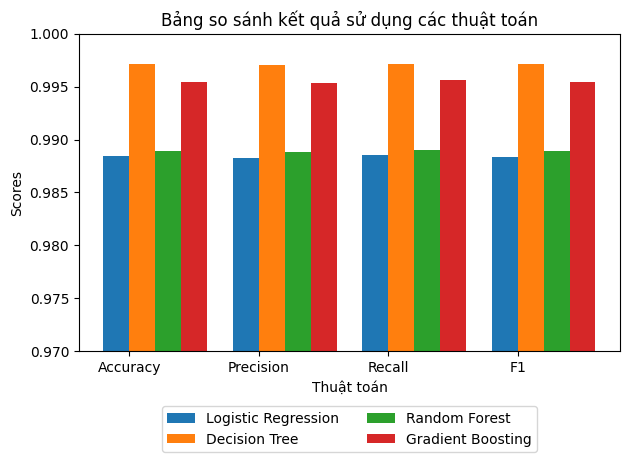

In [108]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

performance = {
    'Logistic Regression': [lr_accurency_scores,lr_precision_scores,lr_recall_scores, lr_f1_scores],
    'Decision Tree': [dtc_accurency_scores,dtc_precision_scores,dtc_recall_scores, dtc_f1_scores],
    'Random Forest': [rfc_accurency_scores,rfc_precision_scores,rfc_recall_scores, rfc_f1_scores],
    'Gradient Boosting': [gbc_accurency_scores,gbc_precision_scores,gbc_recall_scores, gbc_f1_scores],
}

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()

for i, (model, values) in enumerate(performance.items()):
    ax.bar(x + i*width, values, width, label=model)

ax.set_xlabel('Thuật toán')
ax.set_ylabel('Scores')
ax.set_title('Bảng so sánh kết quả sử dụng các thuật toán')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0.97, 1.00)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.tight_layout()

plt.show()

In [66]:
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n== 1:
    return "It is a Fact News"

In [67]:
def manual_testing(news):
  testing_news = {"text": [news]} # Corrected syntax for defining dictionary
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test) # Assuming 'vectorization' is your vectorizer object
  pred_lr = LR.predict(new_xv_test)
  pred_dtc = dtc.predict(new_xv_test)
  pred_gbc = gbc.predict(new_xv_test)
  pred_rfc = rfc.predict(new_xv_test)
  return "LR Prediction: {}, DTC Prediction: {}, GBC Prediction: {}, RFC Prediction: {}".format(
      output_label(pred_lr[0]), output_label(pred_dtc[0]), output_label(pred_gbc[0]), output_label(pred_rfc[0]))

In [68]:
news_article = str(input())

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that s

In [69]:
manual_testing(news_article)

'LR Prediction: It is a Fact News, DTC Prediction: It is a Fact News, GBC Prediction: It is a Fact News, RFC Prediction: It is a Fact News'